In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# load data
df = pd.read_csv('austin_weather.csv')
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [3]:
df = df.loc[:, ['Date', 'TempAvgF']]
# add some useful columns
df.loc[:, 'Year'] = df.loc[:, 'Date'].str.slice(0, 4).astype('int')
df.loc[:, 'Month'] = df.loc[:, 'Date'].str.slice(5, 7).astype('int')
df.loc[:, 'Day'] = df.loc[:, 'Date'].str.slice(8, 10).astype('int')
# set a 20 day window then use that to smooth
# temperature in a new column
window = 20
df['20_d_mov_avg'] = df.TempAvgF.rolling(window).mean()
# now let's slice exactly one year on the
# calendar start and end dates
# we see from the previous output that
# 2014 is the first year with complete data,
# however it will still have NaN values for
# the moving average, so we'll use 2015
df_one_year = df.loc[df.Year == 2015, :].reset_index()
df_one_year['Day_of_Year'] = df_one_year.index + 1

In [4]:
# add two columns for sine and cosine of the Day_of_Year
df_one_year['sine_Day']=np.sin(2*np.pi*df_one_year['Day_of_Year']/365)
df_one_year['cosine_Day']=np.cos(2*np.pi*df_one_year['Day_of_Year']/365)
df_one_year

,index,Date,TempAvgF,Year,Month,Day,20_d_mov_avg,Day_of_Year,sine_Day,cosine_Day
0,376,2015-01-01,37,2015,1,1,52.70,1,1.721336e-02,0.999852
1,377,2015-01-02,41,2015,1,2,51.50,2,3.442161e-02,0.999407
2,378,2015-01-03,51,2015,1,3,50.65,3,5.161967e-02,0.998667
3,379,2015-01-04,43,2015,1,4,49.65,4,6.880243e-02,0.997630
4,380,2015-01-05,41,2015,1,5,48.95,5,8.596480e-02,0.996298
...,...,...,...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,12,27,61.10,361,-6.880243e-02,0.997630
361,737,2015-12-28,41,2015,12,28,60.20,362,-5.161967e-02,0.998667
362,738,2015-12-29,43,2015,12,29,59.25,363,-3.442161e-02,0.999407
363,739,2015-12-30,49,2015,12,30,58.45,364,-1.721336e-02,0.999852


In [5]:
#fit model using the Day_of_Year and sin/cos
linear_model=LinearRegression(fit_intercept=True)
linear_model.fit(df_one_year[['Day_of_Year', 'sine_Day', 'cosine_Day']], df_one_year['TempAvgF'])
print('model coefficients: ', linear_model.coef_)
print('model intercept: ', linear_model.intercept_)
print('model r squared: ',
        linear_model.score(
            df_one_year[['Day_of_Year', 'sine_Day', 'cosine_Day']],
            df_one_year['TempAvgF']))

model coefficients:  [ 1.46396364e-02 -5.57332499e+00 -1.67824174e+01]
model intercept:  67.43327530313066
model r squared:  0.779745650129063


In [6]:
#make predictions using the data
y_pred=linear_model.predict(df_one_year[['Day_of_Year', 'sine_Day', 'cosine_Day']])
x_pred=df_one_year.Day_of_Year

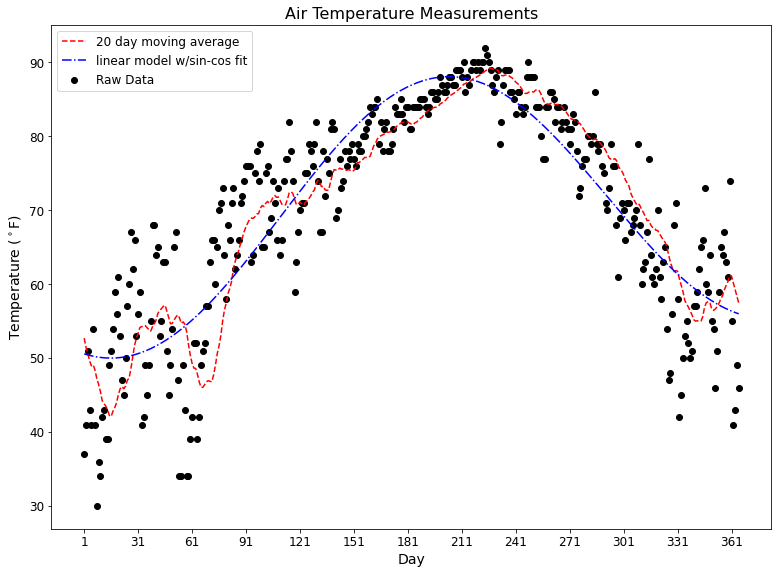

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1])
# Raw data
ax.scatter(df_one_year.Day_of_Year, df_one_year.TempAvgF, label = 'Raw Data', c = 'k')
# Moving averages
ax.plot(df_one_year.Day_of_Year, df_one_year['20_d_mov_avg'], c = 'r', linestyle = '--', label = f'{window} day moving average')
# regression predictions
ax.plot(x_pred, y_pred, c = "blue", linestyle = '-.', label = 'linear model w/sin-cos fit')
ax.set_title('Air Temperature Measurements', fontsize = 16)
ax.set_xlabel('Day', fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), df_one_year.Day_of_Year.max(), 30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12,
loc = 'upper left')
plt.show()